In [1]:
import os
os.chdir(path='../../')
import scanpy as sc
import plotly.express as px
import matplotlib.pyplot as plt
import STForte.helper as stfhelper
sc.set_figure_params(dpi=120, transparent=True, dpi_save=400, frameon=False, vector_friendly=False, format="pdf")
trial_name = "trial-DLPFC-pca/151673"
plot_dir = f"./{trial_name}/plots"
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
sc.settings.figdir = plot_dir
plt.rcParams['font.sans-serif'] = [
    'Helvetica',
    'Arial',
    'sans-serif',]

Global seed set to 0


In [2]:
adata = sc.read_h5ad(f"./{trial_name}/outputs/stforte.h5ad")
adata

AnnData object with n_obs × n_vars = 3639 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'spatialLIBD', 'STForte_Mask', 'mclust_STForte_COMB'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'mclust_STForte_COMB_colors', 'neighbors', 'spatial', 'spatialLIBD_colors', 'umap'
    obsm: 'STForte_ATTR', 'STForte_COMB', 'STForte_TOPO', 'X_umap', 'spatial'
    obsp: 'connectivities', 'distances'

In [3]:
adata_sp = sc.read_h5ad(f"./{trial_name}/outputs/sp.h5ad")
adata_sp

AnnData object with n_obs × n_vars = 14201 × 300
    obs: 'spot_instance', 'mclust_STForte_COMB_with_padding', 'spatialLIBD_with_padding'
    uns: 'mclust_STForte_COMB_with_padding_colors', 'neighbors', 'spatialLIBD_with_padding_colors', 'spot_instance_colors', 'umap'
    obsm: 'SP_ATTR_FP', 'SP_COMB', 'SP_TOPO', 'X_umap', 'spatial'
    obsp: 'A_STForte_conn', 'A_STForte_recon', 'connectivities', 'distances'

In [4]:
used_adata = adata[~adata.obs['spatialLIBD'].isna()]
sc.tl.paga(used_adata, groups='spatialLIBD')

/home/chunxuan/miniconda3/envs/stforte/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


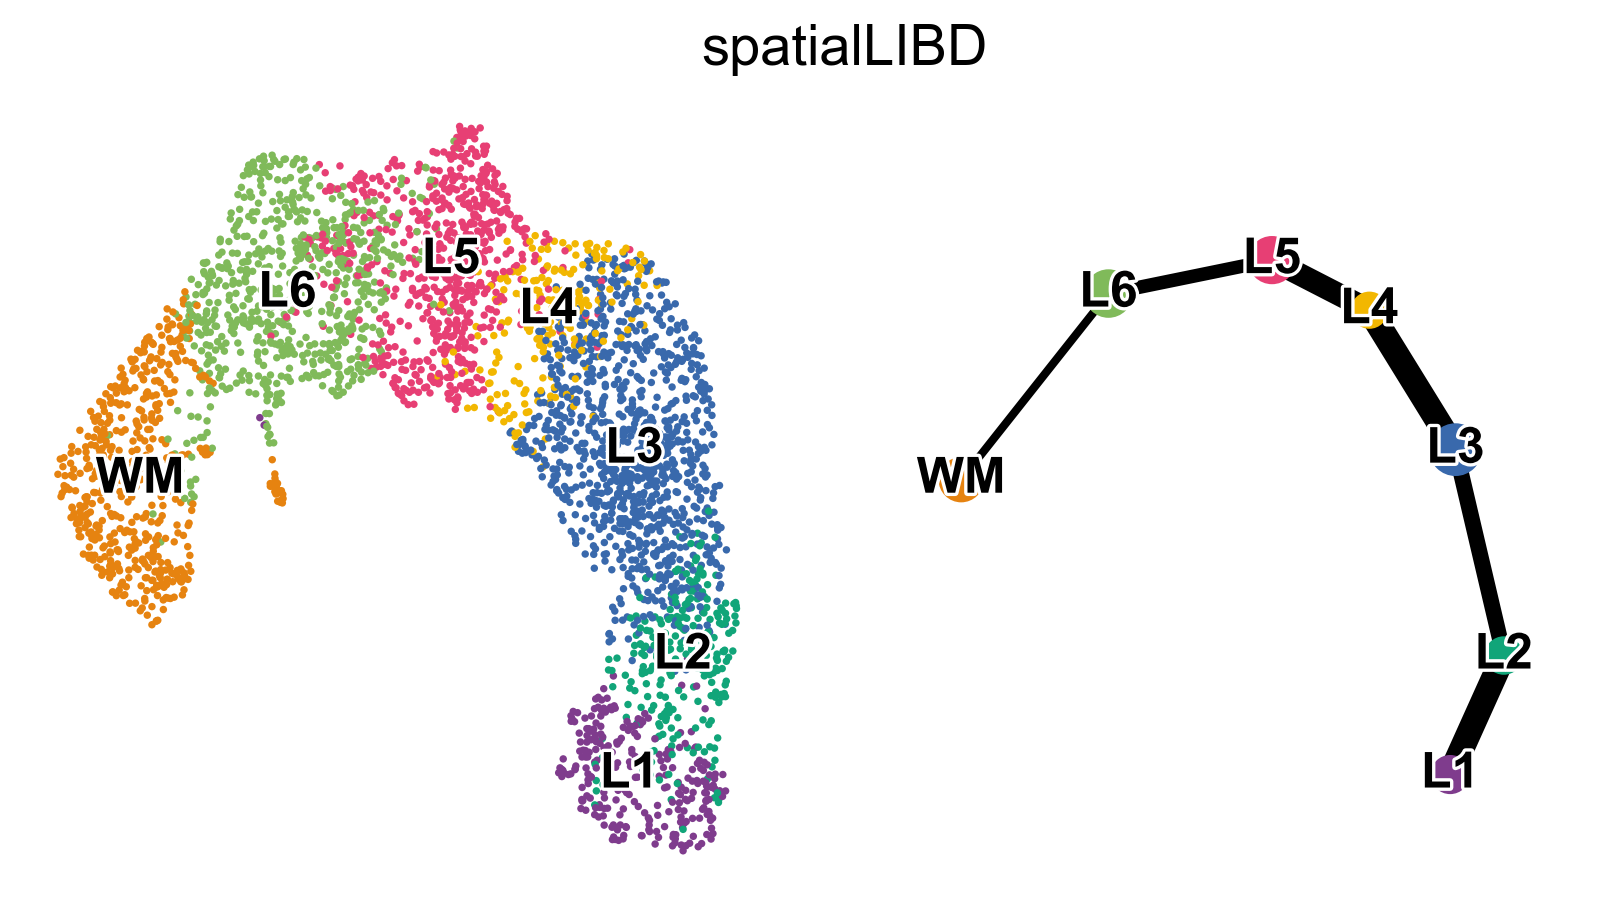

In [5]:
sc.pl.paga_compare(used_adata, legend_fontsize=15, frameon=False, size=20,
                   palette=stfhelper.pl.rgb2hex(px.colors.qualitative.Bold),
                   legend_fontoutline=2, threshold = 0.03,
                   save="_gd",)

In [6]:
used_adata_sp = adata_sp[~adata_sp.obs['spatialLIBD_with_padding'].isna()]
sc.tl.paga(used_adata_sp, groups='spatialLIBD_with_padding')

/home/chunxuan/miniconda3/envs/stforte/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


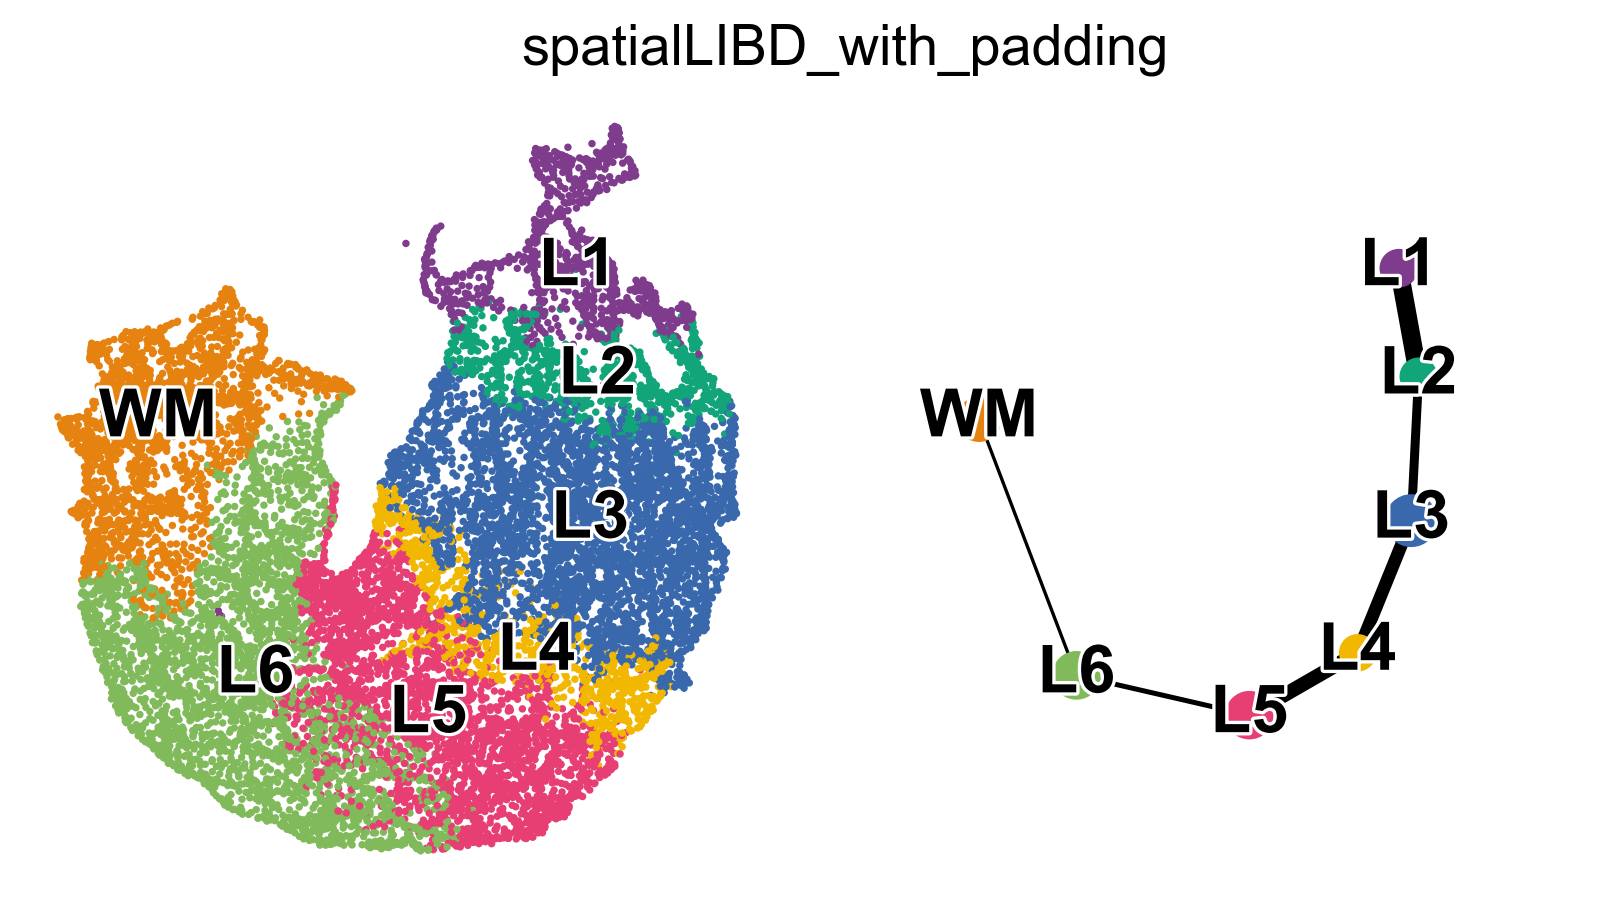

In [7]:
sc.pl.paga_compare(used_adata_sp, legend_fontsize=20, frameon=False, size=20,
                   legend_fontoutline=2,
                   save="_sp_gd",)